# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [23]:
jokes_df = pd.read_csv("jokes.csv")

In [24]:
ratings_df = jokes_df.iloc[:200,1:]

In [25]:
ratings_df.head()

Joke1  Joke2  Joke3  Joke4  Joke5  ...  Joke96  Joke97  Joke98  Joke99  Joke100
0  -7.82   8.79  -9.66  -8.16  -7.52  ...   99.00   -5.63   99.00   99.00    99.00
1   4.08  -0.29   6.36   4.37  -2.38  ...   -2.14    3.06    0.34   -4.32     1.07
2  99.00  99.00  99.00  99.00   9.03  ...   99.00   99.00   99.00   99.00    99.00
3  99.00   8.35  99.00  99.00   1.80  ...   99.00   99.00   99.00   99.00    99.00
4   8.50   4.61  -4.17  -5.39   1.36  ...    1.55    3.11    6.55    1.80     1.60

[5 rows x 100 columns]

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [26]:
ratings_df.isnull().any().sum()

0

In [27]:
ratings_df.replace(to_replace=99,value=0,inplace=True)

In [28]:
ratings_df.head()

Joke1  Joke2  Joke3  Joke4  Joke5  ...  Joke96  Joke97  Joke98  Joke99  Joke100
0  -7.82   8.79  -9.66  -8.16  -7.52  ...    0.00   -5.63    0.00    0.00     0.00
1   4.08  -0.29   6.36   4.37  -2.38  ...   -2.14    3.06    0.34   -4.32     1.07
2   0.00   0.00   0.00   0.00   9.03  ...    0.00    0.00    0.00    0.00     0.00
3   0.00   8.35   0.00   0.00   1.80  ...    0.00    0.00    0.00    0.00     0.00
4   8.50   4.61  -4.17  -5.39   1.36  ...    1.55    3.11    6.55    1.80     1.60

[5 rows x 100 columns]

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [32]:
mean_ratings = ratings_df.mean()

### Q5. List most popular 10 jokes

In [35]:
mean_ratings.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [36]:
books = pd.read_csv("BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [41]:
books.shape

(271360, 8)

In [44]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [47]:
books.drop(columns=['imageUrlS','imageUrlM','imageUrlL'],inplace=True)

In [49]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

In [59]:
books.head()

ISBN  ...                   publisher
0  0195153448  ...     Oxford University Press
1  0002005018  ...       HarperFlamingo Canada
2  0060973129  ...             HarperPerennial
3  0374157065  ...        Farrar Straus Giroux
4  0393045218  ...  W. W. Norton &amp; Company

[5 rows x 5 columns]

In [42]:
users.shape

(278858, 3)

In [45]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [57]:
users.head()

userID                            Location   Age
0       1                  nyc, new york, usa   NaN
1       2           stockton, california, usa  18.0
2       3     moscow, yukon territory, russia   NaN
3       4           porto, v.n.gaia, portugal  17.0
4       5  farnborough, hants, united kingdom   NaN

In [56]:
ratings.head()

userID        ISBN  bookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6

In [43]:
ratings.shape

(1149780, 3)

In [46]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Users from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [50]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [51]:
ratings_new.shape

(1031136, 3)

In [54]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [55]:
ratings_new.shape

(1031136, 3)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [64]:
ratings_explicit=ratings_new[ratings_new['bookRating']!=0]
ratings_explicit.shape


(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


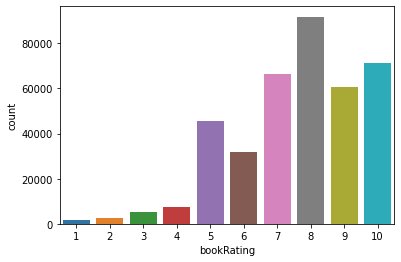

In [65]:
import seaborn as sns
sns.countplot(ratings_explicit['bookRating'])

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [66]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 12.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618270 sha256=9a0a21c382caec86c6ec9c8882b82cb223b3aba11787e5d19fbe2303729fe891
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [68]:
ratings_explicit.head()

userID        ISBN  bookRating
1   276726  0155061224           5
3   276729  052165615X           3
4   276729  0521795028           6
8   276744  038550120X           7
16  276747  0060517794           9

In [69]:
ratings_explicit=ratings_explicit.groupby('userID').filter(lambda x: len(x) >= 100)
ratings_explicit.reset_index()
ratings_explicit.head()

userID        ISBN  bookRating
1456  277427  002542730X          10
1458  277427  003008685X           8
1461  277427  0060006641          10
1465  277427  0060542128           7
1474  277427  0061009059           9

In [70]:
ratings_explicit.shape

(103271, 3)

In [78]:
ratings_explicit.head(5)

userID        ISBN  bookRating
1456  277427  002542730X          10
1458  277427  003008685X           8
1461  277427  0060006641          10
1465  277427  0060542128           7
1474  277427  0061009059           9

In [71]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

In [72]:
data = Dataset.load_from_df(ratings_explicit[['userID', 'ISBN', 'bookRating']],reader)

In [74]:
data.df.shape

(103271, 3)

In [77]:
data.df.head(5)

userID        ISBN  bookRating
1456  277427  002542730X          10
1458  277427  003008685X           8
1461  277427  0060006641          10
1465  277427  0060542128           7
1474  277427  0061009059           9

Q6. Apply SVD for user based filtering

1 Split the data into train and test

2 Train model on SVD

3 Test Accuracy of the model

In [79]:
from surprise.model_selection import train_test_split

In [80]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=11)

In [81]:
from surprise import SVD, accuracy

In [82]:
svd_model = SVD(n_factors=50, biased=False)

In [83]:
svd_model.fit(trainset)

In [85]:
accuracy.rmse(svd_model.test(testset))

RMSE: 3.2172


3.2171754625989046

In [90]:
test_pred = svd_model.test(testset)

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [93]:
test_pred=pd.DataFrame(test_pred)

def get_recomendations(userId, num):
  user_rec = test_pred[test_pred['uid'] == userId][['uid','iid','r_ui','est']].sort_values(by='est', ascending = False).head(num)
  return user_rec

In [95]:
test_pred.columns

Index(['uid', 'iid', 'r_ui', 'est', 'details'], dtype='object')

In [94]:
get_recomendations(277427,5)

uid         iid  r_ui       est
12     277427  0740723367   9.0  7.911702
6744   277427  0890876967   6.0  7.821698
24322  277427  1852303468   7.0  7.821698
23928  277427  0718002067   8.0  7.821698
19167  277427  0912452161   5.0  7.821698